In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dEscaleDown', 'dEscaleUp', 'dEsigmaDown', 'dEsigmaUp', 'deltaEtaSC', 'dr03EcalRecHitSumEt', 'dr03HcalDepth1TowerSumEt', 'dr03TkSumPt', 'dr03TkSumPtHEEP', 'dxy', 'dxyErr', 'dz', 'dzErr', 'eCorr', 'eInvMinusPInv', 'energyErr', 'eta', 'hoe', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'mvaFall17V2Iso', 'mvaFall17V2noIso', 'pfRelIso03_all', 'pfRelIso03_chg', 'phi', 'pt', 'r9', 'scEtOverPt', 'sieie', 'sip3d', 'mvaTTH', 'charge', 'cutBased', 'jetIdx', 'pdgId', 'photonIdx', 'tightCharge', 'vidNestedWPBitmap', 'vidNestedWPBitmapHEEP', 'convVeto', 'cutBased_HEEP', 'isPFcand', 'jetNDauCharged', 'lostHits', 'mvaFall17V2Iso_WP80', 'mvaFall17V2Iso_WP90', 'mvaFall17V2Iso_WPL', 'mvaFall17V2noIso_WP80', 'mvaFall17V2noIso_WP90', 'mvaFall17V2noIso_WPL', 'seedGain', 'genPartIdx', 'genPartFlav', 'cleanmask', 'genPartIdxG', 'jetIdxG', 'photonIdxG']


# Basic Information
## We want basic 4 vector or related variables

## eta

4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [2.26, 2.02], [], [], [], [1.06], [], []]
2mu2e eta structure: [[-0.31, -0.276], [-1.66, -1.72], [-0.0475], ... [-0.159], [1.18], [0.142, 0.099]]
4mu eta structure: [[2.3], [], [], [], [], [], [], [], [], ... [], [-2], [], [], [], [], [], [], []]
2mu2e eta structure: [[1.4, 1.36], [-0.0938, -0.0121], [-0.411, ... 1.33], [-0.539, -0.507], [1.55, 1.6]]
4mu eta structure: [[], [], [], [], [], [], [], [1.25], [], ... [], [], [], [1.31], [-0.3], [], [], []]
2mu2e eta structure: [[], [0.505], [-1.75], [], [-0.881, -1.23], ... [2.53], [], [], [], [0.864, 0.81]]
4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [-1.27], [], [], [], [], [], [0.503], []]
2mu2e eta structure: [[2.49], [], [2.06], [], [], [], [], ... -1.69, 1.6], [], [], [], [], [], [-0.223]]
4mu eta structure: [[], [], [], [2.31], [], [], [], [], ... [], [], [], [-0.729], [1.91, -1.1], [], []]
2mu2e eta structure: [[], [], [], [], [], [], [], [-1.88], ... [], [

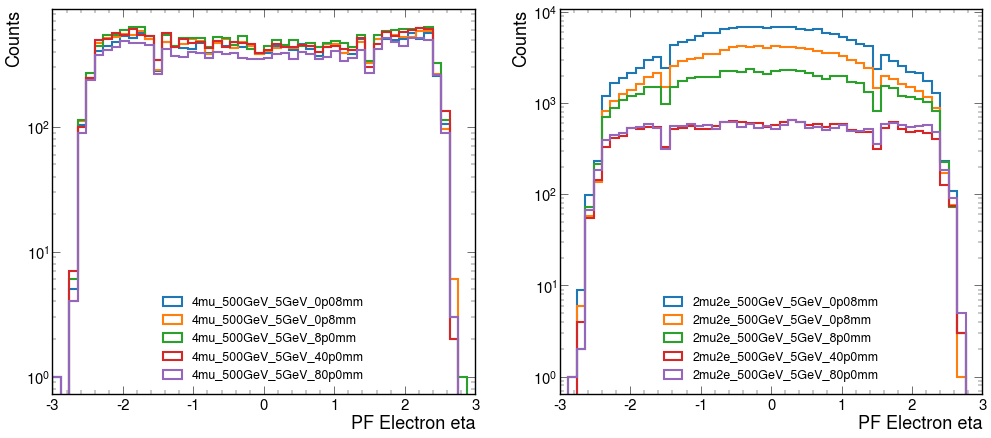

In [18]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_xlabel('PF Electron eta')
ax[1].set_xlabel('PF Electron eta')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/eta.png", bbox_inches="tight")

4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [2.26, 2.02], [], [], [], [1.06], [], []]
2mu2e eta structure: [[-0.31, -0.276], [-1.66, -1.72], [-0.0475], ... [-0.159], [1.18], [0.142, 0.099]]
4mu eta structure: [[2.3], [], [], [], [], [], [], [], [], ... [], [-2], [], [], [], [], [], [], []]
2mu2e eta structure: [[1.4, 1.36], [-0.0938, -0.0121], [-0.411, ... 1.33], [-0.539, -0.507], [1.55, 1.6]]
4mu eta structure: [[], [], [], [], [], [], [], [1.25], [], ... [], [], [], [1.31], [-0.3], [], [], []]
2mu2e eta structure: [[], [0.505], [-1.75], [], [-0.881, -1.23], ... [2.53], [], [], [], [0.864, 0.81]]
4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [-1.27], [], [], [], [], [], [0.503], []]
2mu2e eta structure: [[2.49], [], [2.06], [], [], [], [], ... -1.69, 1.6], [], [], [], [], [], [-0.223]]
4mu eta structure: [[], [], [], [2.31], [], [], [], [], ... [], [], [], [-0.729], [1.91, -1.1], [], []]
2mu2e eta structure: [[], [], [], [], [], [], [], [-1.88], ... [], [

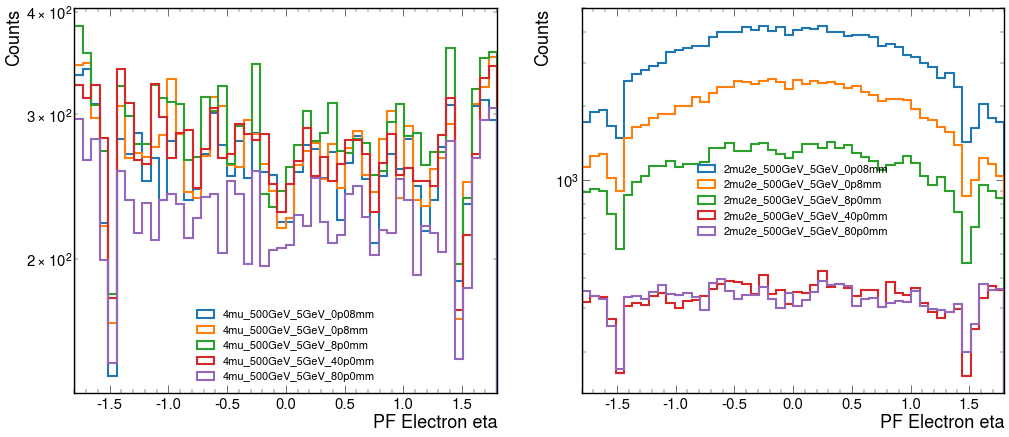

In [19]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-1.8,1.8), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-1.8,1.8), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1.8,1.8)
ax[1].set_xlim(-1.8,1.8)
ax[0].set_xlabel('PF Electron eta')
ax[1].set_xlabel('PF Electron eta')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/eta_low.png", bbox_inches="tight")

## mass

4mu mass structure: [[], [], [], [], [], [], [], [], ... 0.00337], [], [], [], [0.00812], [], []]
2mu2e mass structure: [[-0.0152, 0.00767], [-0.0751, 0.0363], ... -0.0528], [0.0969], [-0.047, 0.0109]]
4mu mass structure: [[-0.00186], [], [], [], [], [], [], [], ... [-0.00645], [], [], [], [], [], [], []]
2mu2e mass structure: [[0.101, 0.0324], [-0.0474, 0.00417], ... [0.0457, -0.00368], [-0.117, 0.0425]]
4mu mass structure: [[], [], [], [], [], [], [], [-0.00293, ... [], [], [-0.0563], [0.00025], [], [], []]
2mu2e mass structure: [[], [0.00356], [-0.181], [], [0.049, ... -0.0355], [], [], [], [0.0809, -0.00848]]
4mu mass structure: [[], [], [], [], [], [], [], [], ... [], [], [], [], [], [-0.00236], []]
2mu2e mass structure: [[0.0214], [], [0.00561], [], [], [], [], ... 0.0079], [], [], [], [], [], [0.0586]]
4mu mass structure: [[], [], [], [-0.0105], [], [], [], ... [], [-0.0162], [-0.0209, 0.00301], [], []]
2mu2e mass structure: [[], [], [], [], [], [], [], [0.00432], ... [], [0.010

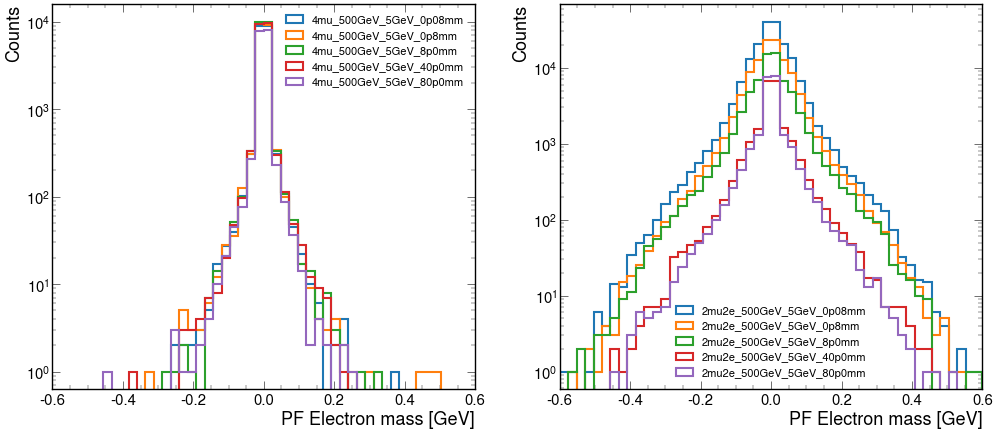

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mass", events_4mu[i_4mu].mass, events_2mu2e[i_2mu].mass)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mass), range=(-0.6,0.6), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mass), range=(-0.6,0.6), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-0.6,0.6)
ax[1].set_xlim(-0.6,0.6)
ax[0].set_xlabel('PF Electron mass [GeV]')
ax[1].set_xlabel('PF Electron mass [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/mass.png", bbox_inches="tight")

4mu mass structure: [[], [], [], [], [], [], [], [], ... 0.00337], [], [], [], [0.00812], [], []]
2mu2e mass structure: [[-0.0152, 0.00767], [-0.0751, 0.0363], ... -0.0528], [0.0969], [-0.047, 0.0109]]
4mu mass structure: [[-0.00186], [], [], [], [], [], [], [], ... [-0.00645], [], [], [], [], [], [], []]
2mu2e mass structure: [[0.101, 0.0324], [-0.0474, 0.00417], ... [0.0457, -0.00368], [-0.117, 0.0425]]
4mu mass structure: [[], [], [], [], [], [], [], [-0.00293, ... [], [], [-0.0563], [0.00025], [], [], []]
2mu2e mass structure: [[], [0.00356], [-0.181], [], [0.049, ... -0.0355], [], [], [], [0.0809, -0.00848]]
4mu mass structure: [[], [], [], [], [], [], [], [], ... [], [], [], [], [], [-0.00236], []]
2mu2e mass structure: [[0.0214], [], [0.00561], [], [], [], [], ... 0.0079], [], [], [], [], [], [0.0586]]
4mu mass structure: [[], [], [], [-0.0105], [], [], [], ... [], [-0.0162], [-0.0209, 0.00301], [], []]
2mu2e mass structure: [[], [], [], [], [], [], [], [0.00432], ... [], [0.010

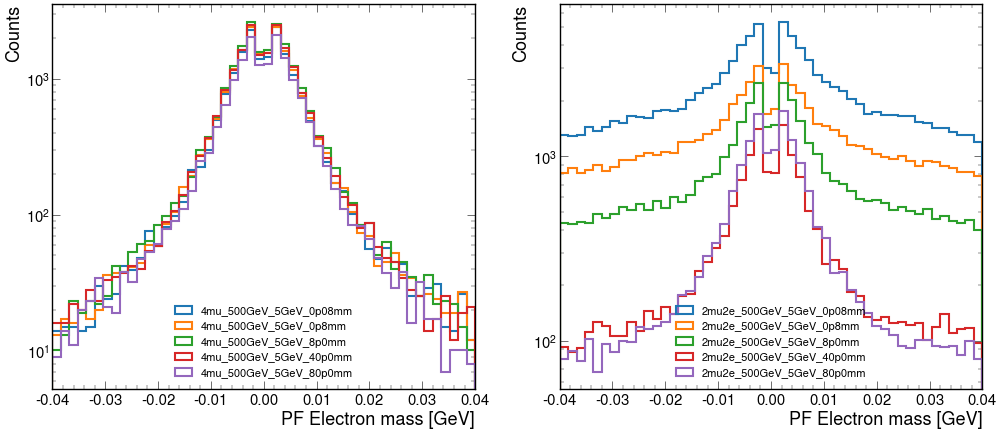

In [16]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mass", events_4mu[i_4mu].mass, events_2mu2e[i_2mu].mass)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mass), range=(-0.04,0.04), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mass), range=(-0.04,0.04), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-0.04,0.04)
ax[1].set_xlim(-0.04,0.04)
ax[0].set_xlabel('PF Electron mass [GeV]')
ax[1].set_xlabel('PF Electron mass [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/mass_low.png", bbox_inches="tight")

4mu mass structure: [[], [], [], [], [], [], [], [], ... 0.00337], [], [], [], [0.00812], [], []]
2mu2e mass structure: [[-0.0152, 0.00767], [-0.0751, 0.0363], ... -0.0528], [0.0969], [-0.047, 0.0109]]
4mu mass structure: [[-0.00186], [], [], [], [], [], [], [], ... [-0.00645], [], [], [], [], [], [], []]
2mu2e mass structure: [[0.101, 0.0324], [-0.0474, 0.00417], ... [0.0457, -0.00368], [-0.117, 0.0425]]
4mu mass structure: [[], [], [], [], [], [], [], [-0.00293, ... [], [], [-0.0563], [0.00025], [], [], []]
2mu2e mass structure: [[], [0.00356], [-0.181], [], [0.049, ... -0.0355], [], [], [], [0.0809, -0.00848]]
4mu mass structure: [[], [], [], [], [], [], [], [], ... [], [], [], [], [], [-0.00236], []]
2mu2e mass structure: [[0.0214], [], [0.00561], [], [], [], [], ... 0.0079], [], [], [], [], [], [0.0586]]
4mu mass structure: [[], [], [], [-0.0105], [], [], [], ... [], [-0.0162], [-0.0209, 0.00301], [], []]
2mu2e mass structure: [[], [], [], [], [], [], [], [0.00432], ... [], [0.010

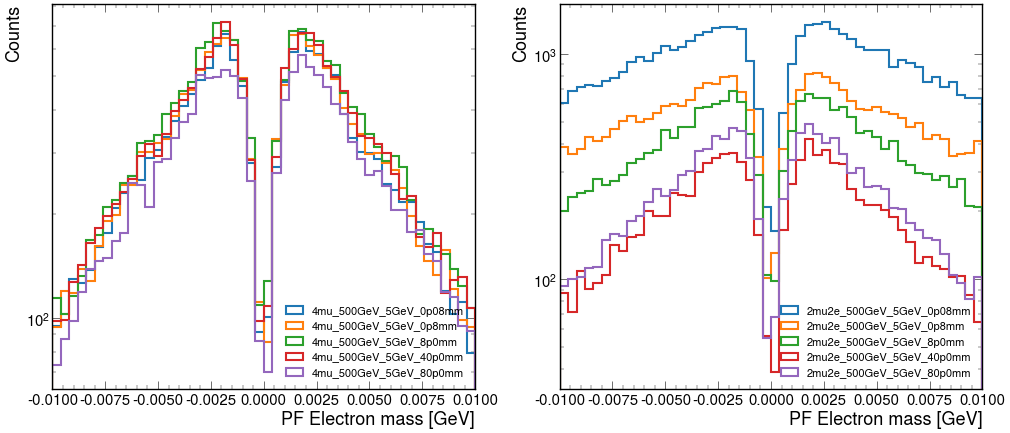

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mass", events_4mu[i_4mu].mass, events_2mu2e[i_2mu].mass)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mass), range=(-0.01,0.01), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mass), range=(-0.01,0.01), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-0.01,0.01)
ax[1].set_xlim(-0.01,0.01)
ax[0].set_xlabel('PF Electron mass [GeV]')
ax[1].set_xlabel('PF Electron mass [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/mass_superlow.png", bbox_inches="tight")

## phi

4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [-1.52, -1.45], [], [], [], [1.47], [], []]
2mu2e phi structure: [[-0.994, -1.06], [-0.481, -0.451], [-2.43], ... [-1.71], [-2.34], [1.73, 1.69]]
4mu phi structure: [[-0.426], [], [], [], [], [], [], [], [], ... [-2.3], [], [], [], [], [], [], []]
2mu2e phi structure: [[-1.97, -2], [-2.88, -2.88], [1.52, 1.45, ... -0.631], [2.84, 2.87], [-0.688, -0.7]]
4mu phi structure: [[], [], [], [], [], [], [], [-0.343], ... [], [], [-3.14], [1.14], [], [], []]
2mu2e phi structure: [[], [-1.56], [-0.602], [], [-2.91, -1.54], ... [2.94], [], [], [], [-0.815, -0.848]]
4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [2.67], [], [], [], [], [], [0.913], []]
2mu2e phi structure: [[2.64], [], [-2.04], [], [], [], [], ... -0.476], [], [], [], [], [], [0.535]]
4mu phi structure: [[], [], [], [0.594], [], [], [], ... [], [], [-0.289], [-2.16, -0.273], [], []]
2mu2e phi structure: [[], [], [], [], [], [], [], [0.895], ... [], [-2.34], [

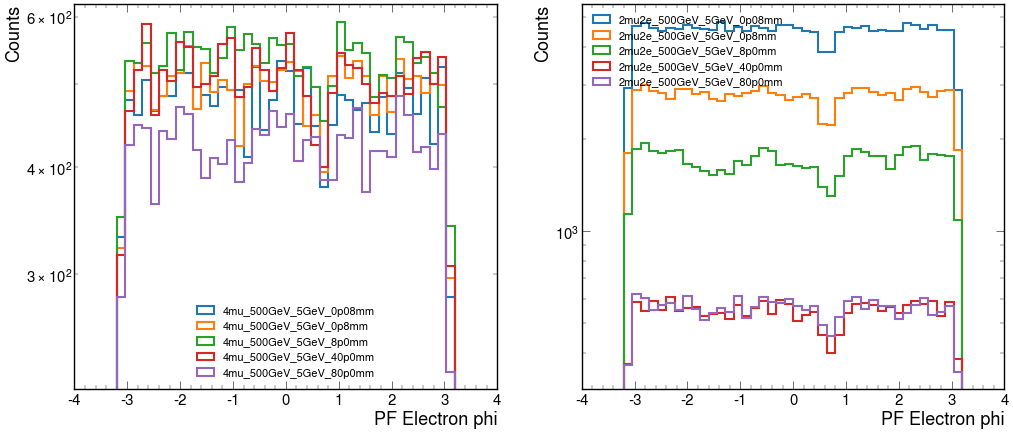

In [21]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi", events_4mu[i_4mu].phi, events_2mu2e[i_2mu].phi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('PF Electron phi')
ax[1].set_xlabel('PF Electron phi')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/phi.png", bbox_inches="tight")

4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [-1.52, -1.45], [], [], [], [1.47], [], []]
2mu2e phi structure: [[-0.994, -1.06], [-0.481, -0.451], [-2.43], ... [-1.71], [-2.34], [1.73, 1.69]]
4mu phi structure: [[-0.426], [], [], [], [], [], [], [], [], ... [-2.3], [], [], [], [], [], [], []]
2mu2e phi structure: [[-1.97, -2], [-2.88, -2.88], [1.52, 1.45, ... -0.631], [2.84, 2.87], [-0.688, -0.7]]
4mu phi structure: [[], [], [], [], [], [], [], [-0.343], ... [], [], [-3.14], [1.14], [], [], []]
2mu2e phi structure: [[], [-1.56], [-0.602], [], [-2.91, -1.54], ... [2.94], [], [], [], [-0.815, -0.848]]
4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [2.67], [], [], [], [], [], [0.913], []]
2mu2e phi structure: [[2.64], [], [-2.04], [], [], [], [], ... -0.476], [], [], [], [], [], [0.535]]
4mu phi structure: [[], [], [], [0.594], [], [], [], ... [], [], [-0.289], [-2.16, -0.273], [], []]
2mu2e phi structure: [[], [], [], [], [], [], [], [0.895], ... [], [-2.34], [

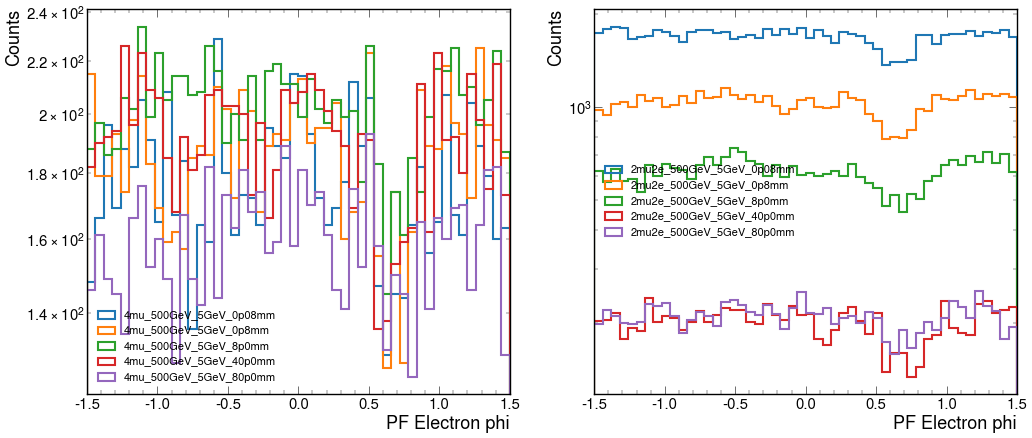

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi", events_4mu[i_4mu].phi, events_2mu2e[i_2mu].phi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi), range=(-1.5,1.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi), range=(-1.5,1.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-1.5,1.5)
ax[1].set_xlim(-1.5,1.5)
ax[0].set_xlabel('PF Electron phi')
ax[1].set_xlabel('PF Electron phi')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='center left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/phi_low.png", bbox_inches="tight")

## pt

4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [7.6, 5.76], [], [], [], [20.6], [], []]
2mu2e pt structure: [[91, 90.3], [175, 40.6], [302], [245], ... [185], [203], [174], [136, 64.1]]
4mu pt structure: [[5.73], [], [], [], [], [], [], [], [], ... [], [7.92], [], [], [], [], [], [], []]
2mu2e pt structure: [[146, 66.2], [180, 19], [236, 11], [131, ... [153], [146], [212, 120], [174, 53.7]]
4mu pt structure: [[], [], [], [], [], [], [], [20.9], [], ... [], [], [], [149], [7.44], [], [], []]
2mu2e pt structure: [[], [15.3], [199], [], [355, 21.4], [], ... 21.4], [27.7], [], [], [], [204, 32.2]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [5.55], [], [], [], [], [], [14.2], []]
2mu2e pt structure: [[14.7], [], [5.38], [], [], [], [], [], ... [26.3, 18.3], [], [], [], [], [], [220]]
4mu pt structure: [[], [], [], [6.74], [], [], [], [], ... [], [], [], [33.9], [22.5, 7.55], [], []]
2mu2e pt structure: [[], [], [], [], [], [], [], [7.54], [], ... 20.6], [], [12],

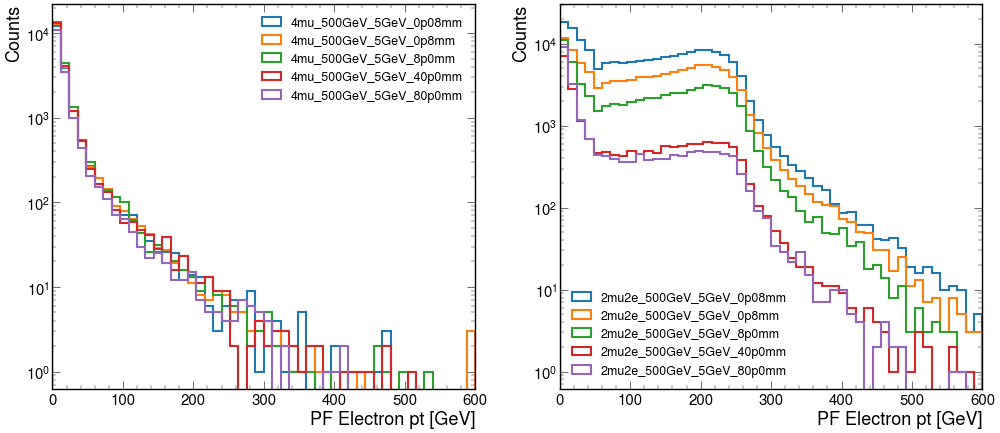

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,600), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,600), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,600)
ax[1].set_xlim(0,600)
ax[0].set_xlabel('PF Electron pt [GeV]')
ax[1].set_xlabel('PF Electron pt [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/pt.png", bbox_inches="tight")

4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [7.6, 5.76], [], [], [], [20.6], [], []]
2mu2e pt structure: [[91, 90.3], [175, 40.6], [302], [245], ... [185], [203], [174], [136, 64.1]]
4mu pt structure: [[5.73], [], [], [], [], [], [], [], [], ... [], [7.92], [], [], [], [], [], [], []]
2mu2e pt structure: [[146, 66.2], [180, 19], [236, 11], [131, ... [153], [146], [212, 120], [174, 53.7]]
4mu pt structure: [[], [], [], [], [], [], [], [20.9], [], ... [], [], [], [149], [7.44], [], [], []]
2mu2e pt structure: [[], [15.3], [199], [], [355, 21.4], [], ... 21.4], [27.7], [], [], [], [204, 32.2]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [5.55], [], [], [], [], [], [14.2], []]
2mu2e pt structure: [[14.7], [], [5.38], [], [], [], [], [], ... [26.3, 18.3], [], [], [], [], [], [220]]
4mu pt structure: [[], [], [], [6.74], [], [], [], [], ... [], [], [], [33.9], [22.5, 7.55], [], []]
2mu2e pt structure: [[], [], [], [], [], [], [], [7.54], [], ... 20.6], [], [12],

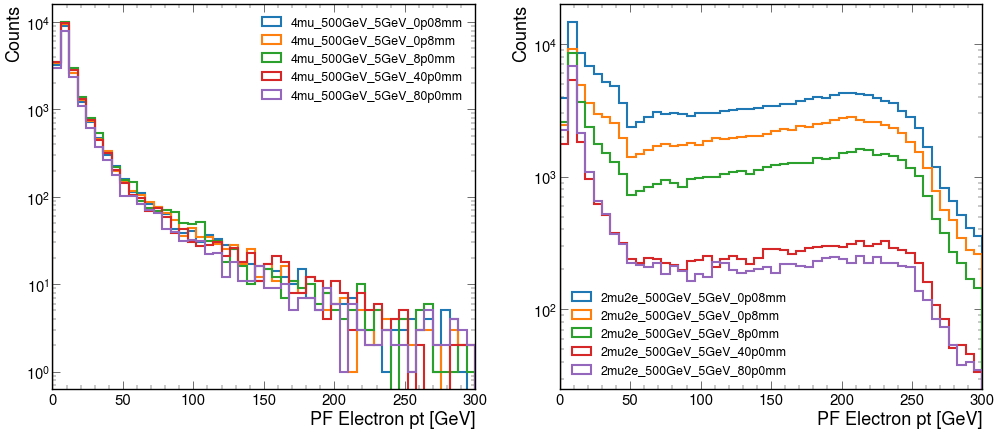

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,300), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,300), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,300)
ax[1].set_xlim(0,300)
ax[0].set_xlabel('PF Electron pt [GeV]')
ax[1].set_xlabel('PF Electron pt [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/pt_low.png", bbox_inches="tight")

4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [7.6, 5.76], [], [], [], [20.6], [], []]
2mu2e pt structure: [[91, 90.3], [175, 40.6], [302], [245], ... [185], [203], [174], [136, 64.1]]
4mu pt structure: [[5.73], [], [], [], [], [], [], [], [], ... [], [7.92], [], [], [], [], [], [], []]
2mu2e pt structure: [[146, 66.2], [180, 19], [236, 11], [131, ... [153], [146], [212, 120], [174, 53.7]]
4mu pt structure: [[], [], [], [], [], [], [], [20.9], [], ... [], [], [], [149], [7.44], [], [], []]
2mu2e pt structure: [[], [15.3], [199], [], [355, 21.4], [], ... 21.4], [27.7], [], [], [], [204, 32.2]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [5.55], [], [], [], [], [], [14.2], []]
2mu2e pt structure: [[14.7], [], [5.38], [], [], [], [], [], ... [26.3, 18.3], [], [], [], [], [], [220]]
4mu pt structure: [[], [], [], [6.74], [], [], [], [], ... [], [], [], [33.9], [22.5, 7.55], [], []]
2mu2e pt structure: [[], [], [], [], [], [], [], [7.54], [], ... 20.6], [], [12],

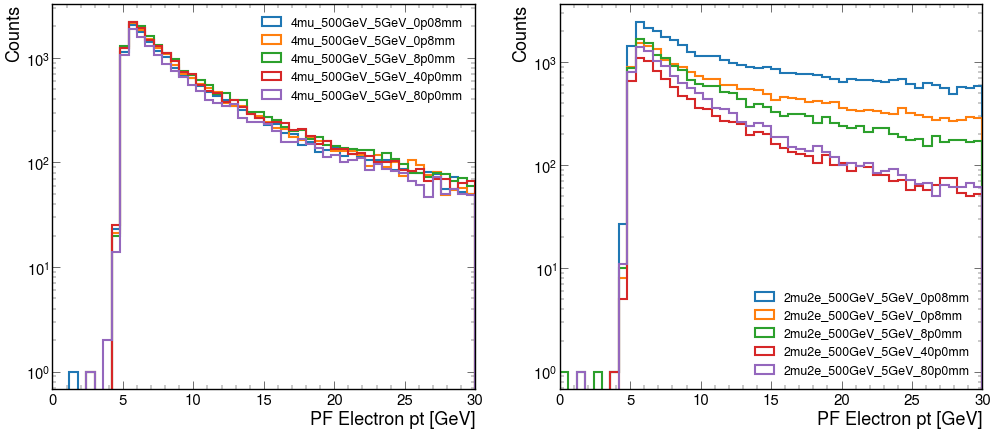

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,30), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,30), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,30)
ax[1].set_xlim(0,30)
ax[0].set_xlabel('PF Electron pt [GeV]')
ax[1].set_xlabel('PF Electron pt [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/pt_superlow.png", bbox_inches="tight")

## deltaEtaSC

4mu deltaEtaSC structure: [[], [], [], [], [], [], [], [], ... 0.0442, 0.0239], [], [], [], [0.00623], [], []]
2mu2e deltaEtaSC structure: [[0.0184, 0.0166], [0.00274, 0.00323], ... [0.00101], [-0.00364, -0.00492]]
4mu deltaEtaSC structure: [[-0.0114], [], [], [], [], [], [], [], ... [0.00986], [], [], [], [], [], [], []]
2mu2e deltaEtaSC structure: [[0.0122, 0.0129], [0.0058, 0.00385], ... [-0.00143, -0.00128], [0.0213, 0.0181]]
4mu deltaEtaSC structure: [[], [], [], [], [], [], [], [0.0155], ... [], [], [0.0104], [-0.0575], [], [], []]
2mu2e deltaEtaSC structure: [[], [0.0106], [0.00209], [], [-0.00625, ... [], [], [], [-0.00794, -0.00404]]
4mu deltaEtaSC structure: [[], [], [], [], [], [], [], [], [], ... [0.0047], [], [], [], [], [], [0.0371], []]
2mu2e deltaEtaSC structure: [[0.00179], [], [0.00717], [], [], [], ... 0.0148], [], [], [], [], [], [0.00064]]
4mu deltaEtaSC structure: [[], [], [], [0.0683], [], [], [], ... [], [], [0.00245], [0.0159, 0.026], [], []]
2mu2e deltaEtaSC s

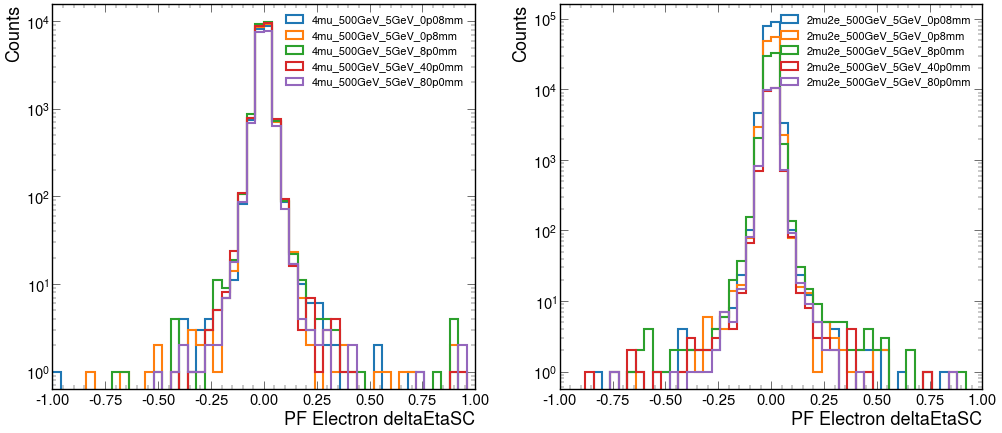

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("deltaEtaSC", events_4mu[i_4mu].deltaEtaSC, events_2mu2e[i_2mu].deltaEtaSC)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].deltaEtaSC), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].deltaEtaSC), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Electron deltaEtaSC')
ax[1].set_xlabel('PF Electron deltaEtaSC')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/deltaEtaSC.png", bbox_inches="tight")

4mu deltaEtaSC structure: [[], [], [], [], [], [], [], [], ... 0.0442, 0.0239], [], [], [], [0.00623], [], []]
2mu2e deltaEtaSC structure: [[0.0184, 0.0166], [0.00274, 0.00323], ... [0.00101], [-0.00364, -0.00492]]
4mu deltaEtaSC structure: [[-0.0114], [], [], [], [], [], [], [], ... [0.00986], [], [], [], [], [], [], []]
2mu2e deltaEtaSC structure: [[0.0122, 0.0129], [0.0058, 0.00385], ... [-0.00143, -0.00128], [0.0213, 0.0181]]
4mu deltaEtaSC structure: [[], [], [], [], [], [], [], [0.0155], ... [], [], [0.0104], [-0.0575], [], [], []]
2mu2e deltaEtaSC structure: [[], [0.0106], [0.00209], [], [-0.00625, ... [], [], [], [-0.00794, -0.00404]]
4mu deltaEtaSC structure: [[], [], [], [], [], [], [], [], [], ... [0.0047], [], [], [], [], [], [0.0371], []]
2mu2e deltaEtaSC structure: [[0.00179], [], [0.00717], [], [], [], ... 0.0148], [], [], [], [], [], [0.00064]]
4mu deltaEtaSC structure: [[], [], [], [0.0683], [], [], [], ... [], [], [0.00245], [0.0159, 0.026], [], []]
2mu2e deltaEtaSC s

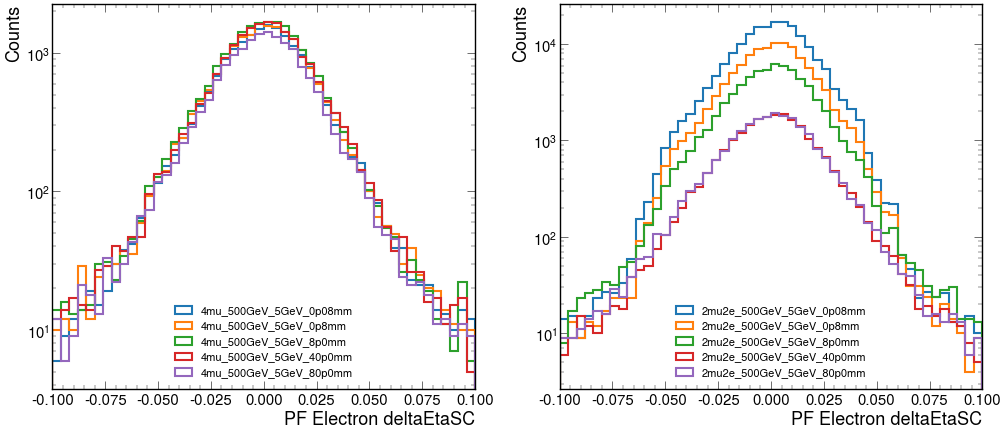

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("deltaEtaSC", events_4mu[i_4mu].deltaEtaSC, events_2mu2e[i_2mu].deltaEtaSC)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].deltaEtaSC), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].deltaEtaSC), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Electron deltaEtaSC')
ax[1].set_xlabel('PF Electron deltaEtaSC')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/deltaEtaSC_low.png", bbox_inches="tight")

## jetPtRelv2

4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [], [], ... [1.25, 1.06], [], [], [], [1.42], [], []]
2mu2e jetPtRelv2 structure: [[5.38, 4.42], [7.42, 2.85], [238], [46.4], ... [22.6], [11.1], [43.5], [6.8, 3.28]]
4mu jetPtRelv2 structure: [[0], [], [], [], [], [], [], [], [], ... [], [6.34], [], [], [], [], [], [], []]
2mu2e jetPtRelv2 structure: [[6.02, 3.11], [16.6, 1.56], [10.7, 1.07], ... [59.6], [7.86, 4.09], [7.2, 3.09]]
4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [4.61], [], ... [], [], [], [26.2], [1.68], [], [], []]
2mu2e jetPtRelv2 structure: [[], [1.24], [16.7], [], [20.8, 1.89], ... [8.91], [], [], [], [12.5, 2.03]]
4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [], [], ... [0.326], [], [], [], [], [], [0.604], []]
2mu2e jetPtRelv2 structure: [[1.62], [], [0.926], [], [], [], [], ... 1.69, 4.25], [], [], [], [], [], [11.8]]
4mu jetPtRelv2 structure: [[], [], [], [1.96], [], [], [], [], ... [], [], [], [3.09], [2.79, 1.77], [], []]
2mu2e jetPtRelv

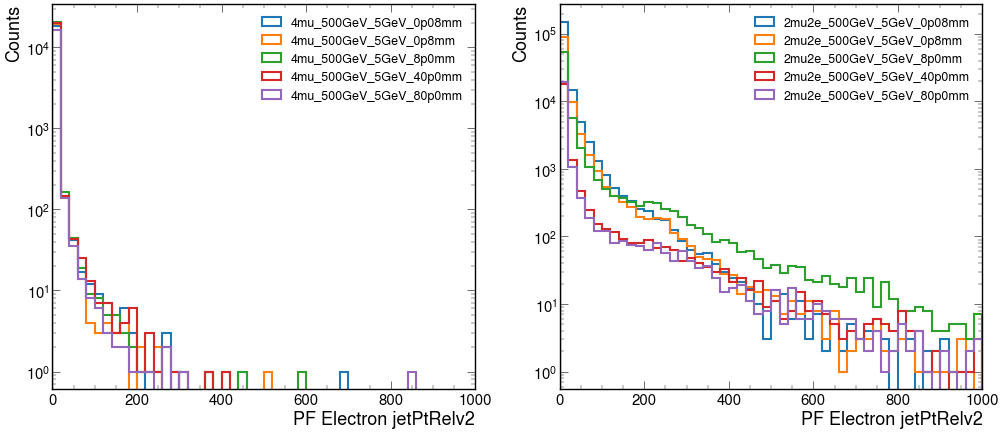

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("jetPtRelv2", events_4mu[i_4mu].jetPtRelv2, events_2mu2e[i_2mu].jetPtRelv2)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].jetPtRelv2), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].jetPtRelv2), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,1000)
ax[1].set_xlim(0,1000)
ax[0].set_xlabel('PF Electron jetPtRelv2')
ax[1].set_xlabel('PF Electron jetPtRelv2')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/jetPtRelv2.png", bbox_inches="tight")

4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [], [], ... [1.25, 1.06], [], [], [], [1.42], [], []]
2mu2e jetPtRelv2 structure: [[5.38, 4.42], [7.42, 2.85], [238], [46.4], ... [22.6], [11.1], [43.5], [6.8, 3.28]]
4mu jetPtRelv2 structure: [[0], [], [], [], [], [], [], [], [], ... [], [6.34], [], [], [], [], [], [], []]
2mu2e jetPtRelv2 structure: [[6.02, 3.11], [16.6, 1.56], [10.7, 1.07], ... [59.6], [7.86, 4.09], [7.2, 3.09]]
4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [4.61], [], ... [], [], [], [26.2], [1.68], [], [], []]
2mu2e jetPtRelv2 structure: [[], [1.24], [16.7], [], [20.8, 1.89], ... [8.91], [], [], [], [12.5, 2.03]]
4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [], [], ... [0.326], [], [], [], [], [], [0.604], []]
2mu2e jetPtRelv2 structure: [[1.62], [], [0.926], [], [], [], [], ... 1.69, 4.25], [], [], [], [], [], [11.8]]
4mu jetPtRelv2 structure: [[], [], [], [1.96], [], [], [], [], ... [], [], [], [3.09], [2.79, 1.77], [], []]
2mu2e jetPtRelv

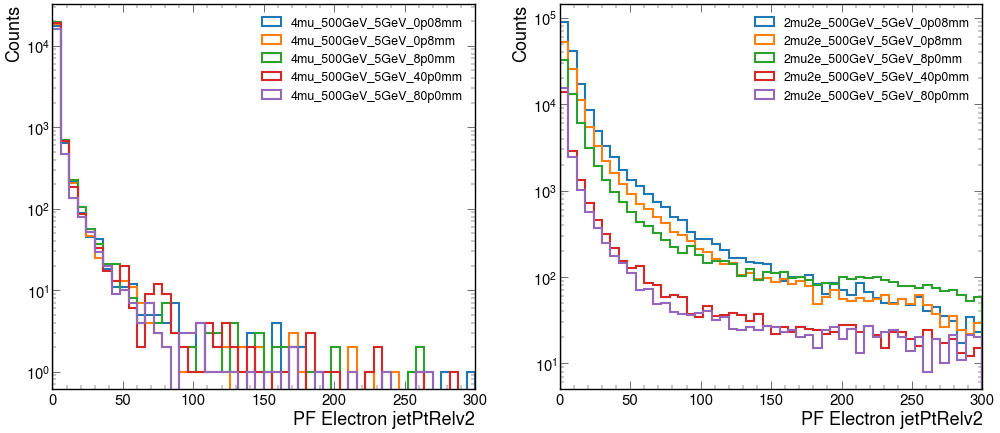

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("jetPtRelv2", events_4mu[i_4mu].jetPtRelv2, events_2mu2e[i_2mu].jetPtRelv2)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].jetPtRelv2), range=(0,300), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].jetPtRelv2), range=(0,300), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,300)
ax[1].set_xlim(0,300)
ax[0].set_xlabel('PF Electron jetPtRelv2')
ax[1].set_xlabel('PF Electron jetPtRelv2')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/jetPtRelv2_low.png", bbox_inches="tight")

4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [], [], ... [1.25, 1.06], [], [], [], [1.42], [], []]
2mu2e jetPtRelv2 structure: [[5.38, 4.42], [7.42, 2.85], [238], [46.4], ... [22.6], [11.1], [43.5], [6.8, 3.28]]
4mu jetPtRelv2 structure: [[0], [], [], [], [], [], [], [], [], ... [], [6.34], [], [], [], [], [], [], []]
2mu2e jetPtRelv2 structure: [[6.02, 3.11], [16.6, 1.56], [10.7, 1.07], ... [59.6], [7.86, 4.09], [7.2, 3.09]]
4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [4.61], [], ... [], [], [], [26.2], [1.68], [], [], []]
2mu2e jetPtRelv2 structure: [[], [1.24], [16.7], [], [20.8, 1.89], ... [8.91], [], [], [], [12.5, 2.03]]
4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [], [], ... [0.326], [], [], [], [], [], [0.604], []]
2mu2e jetPtRelv2 structure: [[1.62], [], [0.926], [], [], [], [], ... 1.69, 4.25], [], [], [], [], [], [11.8]]
4mu jetPtRelv2 structure: [[], [], [], [1.96], [], [], [], [], ... [], [], [], [3.09], [2.79, 1.77], [], []]
2mu2e jetPtRelv

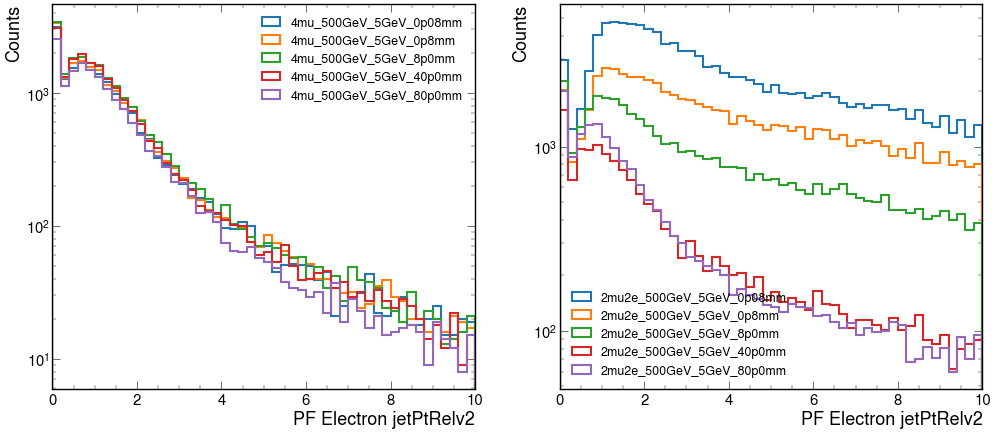

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("jetPtRelv2", events_4mu[i_4mu].jetPtRelv2, events_2mu2e[i_2mu].jetPtRelv2)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].jetPtRelv2), range=(0,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].jetPtRelv2), range=(0,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,10)
ax[1].set_xlim(0,10)
ax[0].set_xlabel('PF Electron jetPtRelv2')
ax[1].set_xlabel('PF Electron jetPtRelv2')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/jetPtRelv2_superlow.png", bbox_inches="tight")

## sieie

4mu sieie structure: [[], [], [], [], [], [], [], [], ... 0.0336, 0.0337], [], [], [], [0.0147], [], []]
2mu2e sieie structure: [[0.0174, 0.016], [0.0507, 0.0468], [0.0113], ... [0.0105], [0.01], [0.00929, 0.02]]
4mu sieie structure: [[0.0453], [], [], [], [], [], [], [], ... [0.0468], [], [], [], [], [], [], []]
2mu2e sieie structure: [[0.0166, 0.0174], [0.00924, 0.017], ... [0.0184, 0.0137], [0.0383, 0.0569]]
4mu sieie structure: [[], [], [], [], [], [], [], [0.0123], ... [], [], [0.016], [0.0123], [], [], []]
2mu2e sieie structure: [[], [0.0132], [0.0224], [], [0.0091, ... 0.0283], [], [], [], [0.00928, 0.00928]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [0.0206], [], [], [], [], [], [0.016], []]
2mu2e sieie structure: [[0.0456], [], [0.0512], [], [], [], [], ... 0.0392], [], [], [], [], [], [0.0095]]
4mu sieie structure: [[], [], [], [0.0207], [], [], [], ... [], [], [0.00832], [0.0385, 0.01], [], []]
2mu2e sieie structure: [[], [], [], [], [], [], [], [0.0464],

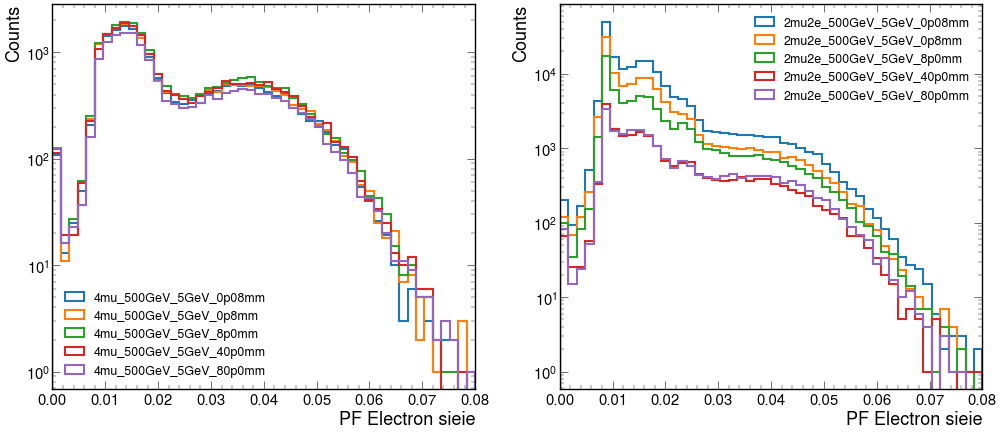

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("sieie", events_4mu[i_4mu].sieie, events_2mu2e[i_2mu].sieie)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].sieie), range=(0,0.08), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].sieie), range=(0,0.08), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,0.08)
ax[1].set_xlim(0,0.08)
ax[0].set_xlabel('PF Electron sieie')
ax[1].set_xlabel('PF Electron sieie')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/sieie.png", bbox_inches="tight")

4mu sieie structure: [[], [], [], [], [], [], [], [], ... 0.0336, 0.0337], [], [], [], [0.0147], [], []]
2mu2e sieie structure: [[0.0174, 0.016], [0.0507, 0.0468], [0.0113], ... [0.0105], [0.01], [0.00929, 0.02]]
4mu sieie structure: [[0.0453], [], [], [], [], [], [], [], ... [0.0468], [], [], [], [], [], [], []]
2mu2e sieie structure: [[0.0166, 0.0174], [0.00924, 0.017], ... [0.0184, 0.0137], [0.0383, 0.0569]]
4mu sieie structure: [[], [], [], [], [], [], [], [0.0123], ... [], [], [0.016], [0.0123], [], [], []]
2mu2e sieie structure: [[], [0.0132], [0.0224], [], [0.0091, ... 0.0283], [], [], [], [0.00928, 0.00928]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [0.0206], [], [], [], [], [], [0.016], []]
2mu2e sieie structure: [[0.0456], [], [0.0512], [], [], [], [], ... 0.0392], [], [], [], [], [], [0.0095]]
4mu sieie structure: [[], [], [], [0.0207], [], [], [], ... [], [], [0.00832], [0.0385, 0.01], [], []]
2mu2e sieie structure: [[], [], [], [], [], [], [], [0.0464],

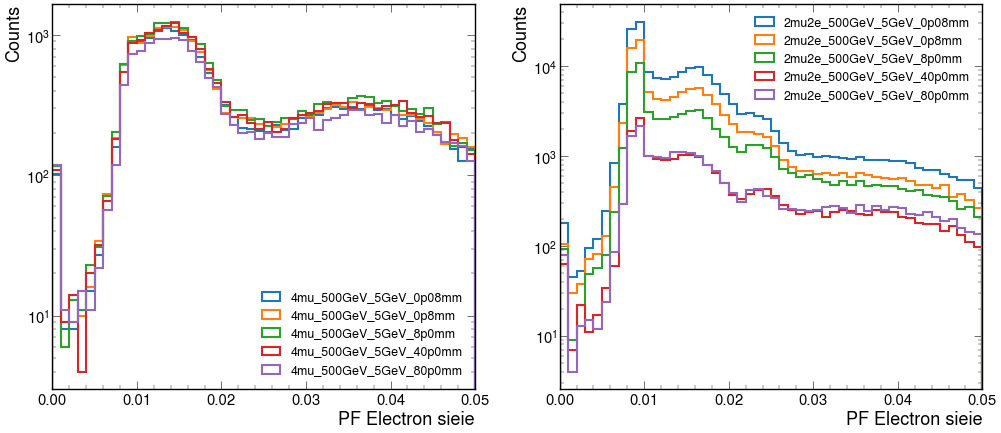

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("sieie", events_4mu[i_4mu].sieie, events_2mu2e[i_2mu].sieie)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].sieie), range=(0,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].sieie), range=(0,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,0.05)
ax[1].set_xlim(0,0.05)
ax[0].set_xlabel('PF Electron sieie')
ax[1].set_xlabel('PF Electron sieie')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/sieie_low.png", bbox_inches="tight")

4mu sieie structure: [[], [], [], [], [], [], [], [], ... 0.0336, 0.0337], [], [], [], [0.0147], [], []]
2mu2e sieie structure: [[0.0174, 0.016], [0.0507, 0.0468], [0.0113], ... [0.0105], [0.01], [0.00929, 0.02]]
4mu sieie structure: [[0.0453], [], [], [], [], [], [], [], ... [0.0468], [], [], [], [], [], [], []]
2mu2e sieie structure: [[0.0166, 0.0174], [0.00924, 0.017], ... [0.0184, 0.0137], [0.0383, 0.0569]]
4mu sieie structure: [[], [], [], [], [], [], [], [0.0123], ... [], [], [0.016], [0.0123], [], [], []]
2mu2e sieie structure: [[], [0.0132], [0.0224], [], [0.0091, ... 0.0283], [], [], [], [0.00928, 0.00928]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [0.0206], [], [], [], [], [], [0.016], []]
2mu2e sieie structure: [[0.0456], [], [0.0512], [], [], [], [], ... 0.0392], [], [], [], [], [], [0.0095]]
4mu sieie structure: [[], [], [], [0.0207], [], [], [], ... [], [], [0.00832], [0.0385, 0.01], [], []]
2mu2e sieie structure: [[], [], [], [], [], [], [], [0.0464],

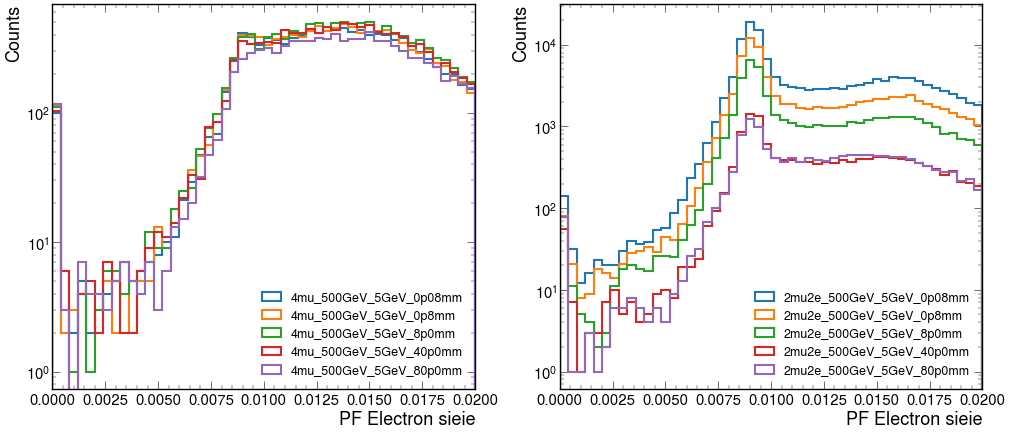

In [18]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("sieie", events_4mu[i_4mu].sieie, events_2mu2e[i_2mu].sieie)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].sieie), range=(0,0.02), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].sieie), range=(0,0.02), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,0.02)
ax[1].set_xlim(0,0.02)
ax[0].set_xlabel('PF Electron sieie')
ax[1].set_xlabel('PF Electron sieie')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/sieie_superlow.png", bbox_inches="tight")

## r9

4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [0.725, 0.749], [], [], [], [0.872], [], []]
2mu2e r9 structure: [[0.979, 0.976], [0.961, 1.08], [0.86], ... [0.948], [0.585], [0.911, 0.985]]
4mu r9 structure: [[1.02], [], [], [], [], [], [], [], [], ... [], [1.1], [], [], [], [], [], [], []]
2mu2e r9 structure: [[0.771, 0.852], [0.952, 0.557], [0.965, ... 0.829], [0.965, 0.882], [0.85, 0.94]]
4mu r9 structure: [[], [], [], [], [], [], [], [0.496], ... [], [], [0.624], [0.977], [], [], []]
2mu2e r9 structure: [[], [0.506], [0.585], [], [0.942, 0.658], ... [1.02], [], [], [], [0.962, 6.75]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [0.93], [], [], [], [], [], [0.928], []]
2mu2e r9 structure: [[0.639], [], [0.805], [], [], [], [], ... 0.588], [], [], [], [], [], [0.971]]
4mu r9 structure: [[], [], [], [0.649], [], [], [], [], ... [], [], [], [1.01], [0.822, 1.01], [], []]
2mu2e r9 structure: [[], [], [], [], [], [], [], [0.853], ... [], [0.522], [1], [], [], []

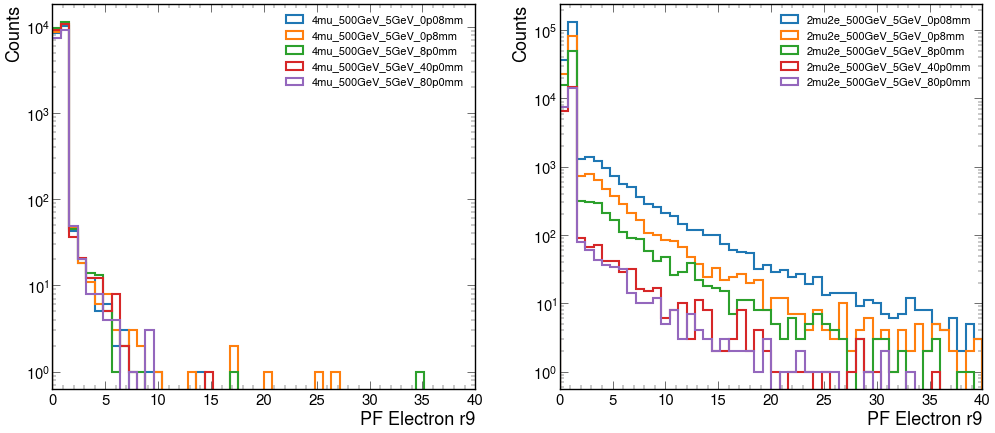

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("r9", events_4mu[i_4mu].r9, events_2mu2e[i_2mu].r9)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].r9), range=(0,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].r9), range=(0,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,40)
ax[1].set_xlim(0,40)
ax[0].set_xlabel('PF Electron r9')
ax[1].set_xlabel('PF Electron r9')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/r9.png", bbox_inches="tight")

4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [0.725, 0.749], [], [], [], [0.872], [], []]
2mu2e r9 structure: [[0.979, 0.976], [0.961, 1.08], [0.86], ... [0.948], [0.585], [0.911, 0.985]]
4mu r9 structure: [[1.02], [], [], [], [], [], [], [], [], ... [], [1.1], [], [], [], [], [], [], []]
2mu2e r9 structure: [[0.771, 0.852], [0.952, 0.557], [0.965, ... 0.829], [0.965, 0.882], [0.85, 0.94]]
4mu r9 structure: [[], [], [], [], [], [], [], [0.496], ... [], [], [0.624], [0.977], [], [], []]
2mu2e r9 structure: [[], [0.506], [0.585], [], [0.942, 0.658], ... [1.02], [], [], [], [0.962, 6.75]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [0.93], [], [], [], [], [], [0.928], []]
2mu2e r9 structure: [[0.639], [], [0.805], [], [], [], [], ... 0.588], [], [], [], [], [], [0.971]]
4mu r9 structure: [[], [], [], [0.649], [], [], [], [], ... [], [], [], [1.01], [0.822, 1.01], [], []]
2mu2e r9 structure: [[], [], [], [], [], [], [], [0.853], ... [], [0.522], [1], [], [], []

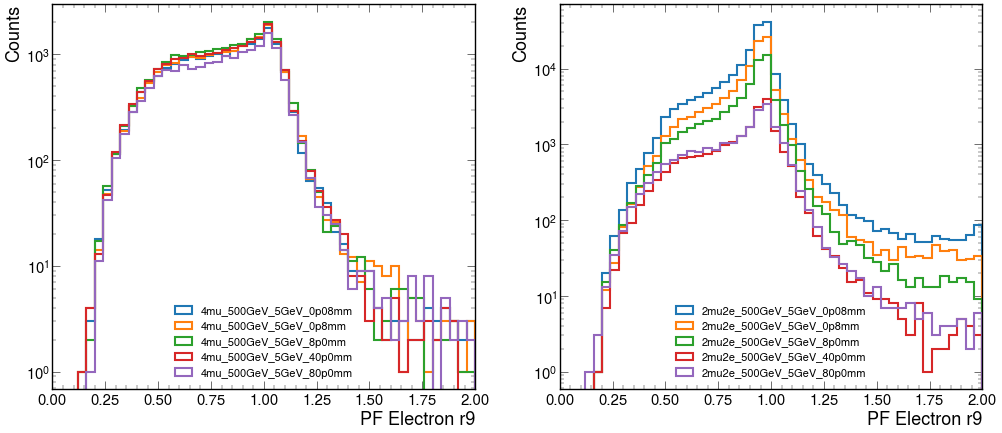

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("r9", events_4mu[i_4mu].r9, events_2mu2e[i_2mu].r9)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].r9), range=(0,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].r9), range=(0,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,2)
ax[1].set_xlim(0,2)
ax[0].set_xlabel('PF Electron r9')
ax[1].set_xlabel('PF Electron r9')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/r9_low.png", bbox_inches="tight")

4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [0.725, 0.749], [], [], [], [0.872], [], []]
2mu2e r9 structure: [[0.979, 0.976], [0.961, 1.08], [0.86], ... [0.948], [0.585], [0.911, 0.985]]
4mu r9 structure: [[1.02], [], [], [], [], [], [], [], [], ... [], [1.1], [], [], [], [], [], [], []]
2mu2e r9 structure: [[0.771, 0.852], [0.952, 0.557], [0.965, ... 0.829], [0.965, 0.882], [0.85, 0.94]]
4mu r9 structure: [[], [], [], [], [], [], [], [0.496], ... [], [], [0.624], [0.977], [], [], []]
2mu2e r9 structure: [[], [0.506], [0.585], [], [0.942, 0.658], ... [1.02], [], [], [], [0.962, 6.75]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [0.93], [], [], [], [], [], [0.928], []]
2mu2e r9 structure: [[0.639], [], [0.805], [], [], [], [], ... 0.588], [], [], [], [], [], [0.971]]
4mu r9 structure: [[], [], [], [0.649], [], [], [], [], ... [], [], [], [1.01], [0.822, 1.01], [], []]
2mu2e r9 structure: [[], [], [], [], [], [], [], [0.853], ... [], [0.522], [1], [], [], []

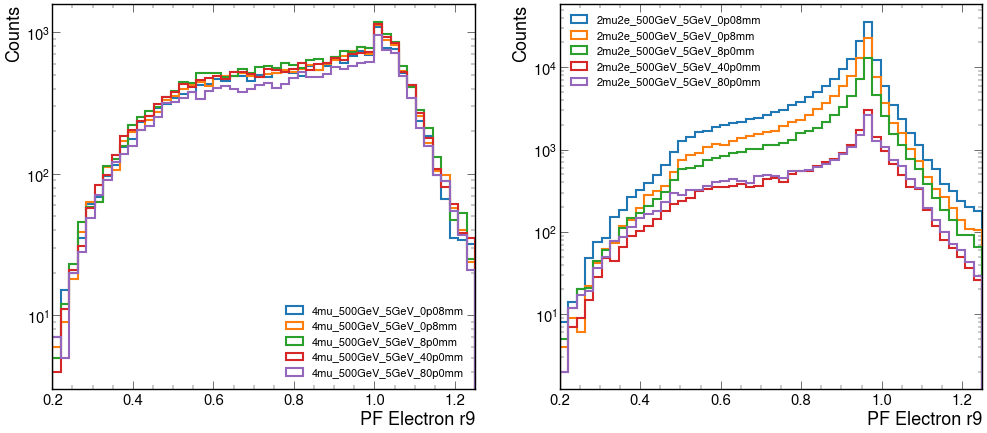

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("r9", events_4mu[i_4mu].r9, events_2mu2e[i_2mu].r9)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].r9), range=(0.2,1.25), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].r9), range=(0.2,1.25), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0.2,1.25)
ax[1].set_xlim(0.2,1.25)
ax[0].set_xlabel('PF Electron r9')
ax[1].set_xlabel('PF Electron r9')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_ELECTRON/Basic/r9_superlow.png", bbox_inches="tight")